In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
#Create empty dataframe for cities
city_df = pd.DataFrame({
    'City':cities
                       })

city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""

city_df.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,,,,,,,,
1,santa fe,,,,,,,,
2,agadez,,,,,,,,
3,kodinsk,,,,,,,,
4,aklavik,,,,,,,,


## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call

for index,row in city_df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(url).json()
    count = 0
   
    city = row['City']
    print("Processing City Record #%s: %s" % (index + 1, city_df.loc[index,"City"]))
    print(url)

    try:
        city_df.loc[index,'Cloudiness']=response['clouds']['all']
        city_df.loc[index,'Country']=response['sys']['country']
        city_df.loc[index,'Date']=response['dt']
        city_df.loc[index,'Humidity']=response['main']['humidity']
        city_df.loc[index,'Lat']=response['coord']['lat']
        city_df.loc[index,'Lng']=response['coord']['lon']
        city_df.loc[index,'Max Temp']=response['main']['temp_max']
        city_df.loc[index,'Wind Speed']=response['wind']['speed']
    except(KeyError):
        
        print("Skip")
        count += 1
        if len(cities) - count < 500:
            break

            
                        


Processing City Record #1: kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=portland
Processing City Record #2: santa fe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=kapaa
Processing City Record #3: agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=santa fe
Processing City Record #4: kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=agadez
Processing City Record #5: aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=kodinsk
Processing City Record #6: buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=aklavik
Processing City Record #7: punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f

Processing City Record #56: puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=east london
Processing City Record #57: clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=puerto ayora
Processing City Record #58: sinop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=clyde river
Processing City Record #59: anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=sinop
Processing City Record #60: bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=anadyr
Processing City Record #61: new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=bluff
Processing City Record #62: shakhtinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing City Record #111: olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=zhezkazgan
Processing City Record #112: kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=olafsvik
Skip
Processing City Record #113: mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=kamenka
Processing City Record #114: charters towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=mogadishu
Processing City Record #115: pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=charters towers
Processing City Record #116: lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=pangkalanbuun
Processing City Record #117: doka
http://api.openweathermap.org/data/2.5/

Processing City Record #166: tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=outjo
Processing City Record #167: isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=tessalit
Processing City Record #168: asfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=isangel
Processing City Record #169: paharpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=asfi
Skip
Processing City Record #170: krumovgrad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=paharpur
Processing City Record #171: silyanah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=krumovgrad
Processing City Record #172: vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a02

Processing City Record #221: hobe sound
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=bend
Processing City Record #222: dzhusaly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=hobe sound
Processing City Record #223: miranorte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=dzhusaly
Skip
Processing City Record #224: viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=miranorte
Skip
Processing City Record #225: vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=viedma
Processing City Record #226: dzhebariki-khaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=vilyuysk
Processing City Record #227: homer
http://api.openweathermap.org/data/2.5/weather?un

Processing City Record #276: rameswaram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=santa maria do suacui
Processing City Record #277: tavistock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=rameswaram
Processing City Record #278: evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=tavistock
Processing City Record #279: sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=evensk
Processing City Record #280: creel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=sumbe
Processing City Record #281: herat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=creel
Processing City Record #282: belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing City Record #331: manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=guerrero negro
Processing City Record #332: samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=manta
Processing City Record #333: sompeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=samusu
Skip
Processing City Record #334: souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=sompeta
Processing City Record #335: general roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=souillac
Processing City Record #336: midland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=general roca
Processing City Record #337: lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing City Record #387: yoichi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=dawei
Processing City Record #388: qibili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=yoichi
Processing City Record #389: hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=qibili
Skip
Processing City Record #390: harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=hovd
Processing City Record #391: luz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=harper
Processing City Record #392: buenos aires
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=luz
Processing City Record #393: haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a

Processing City Record #442: kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=ormara
Processing City Record #443: tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=kattivakkam
Processing City Record #444: suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=tabuk
Processing City Record #445: valley city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=suntar
Processing City Record #446: tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=valley city
Processing City Record #447: chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=tateyama
Processing City Record #448: ransang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing City Record #497: uvarovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=strezhevoy
Processing City Record #498: saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=uvarovo
Processing City Record #499: yongan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=saint-georges
Processing City Record #500: seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=yongan
Processing City Record #501: slanic-moldova
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=seoul
Processing City Record #502: nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=slanic-moldova
Processing City Record #503: itapira
http://api.openweathermap.org/data/2.5/weather?uni

Processing City Record #551: aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=barabai
Processing City Record #552: barao de melgaco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=aquiraz
Processing City Record #553: paradwip
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=barao de melgaco
Processing City Record #554: lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=paradwip
Skip
Processing City Record #555: paramonga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=lima
Processing City Record #556: catuday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=paramonga
Processing City Record #557: karpogory
http://api.openweathermap.org/data/2.5/weather?uni

In [12]:
#Display the City Data Frame after dropping the empty rows
city_df['Cloudiness'].replace('', np.nan, inplace=True)
city_completed_df = city_df.dropna().reset_index(drop=True)
city_completed_df.head()

531

# Latitude vs Temperature Plot

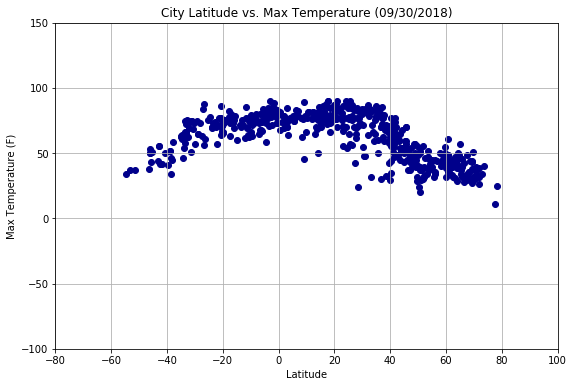

In [13]:
#Plot the graph and define date of analysis
date_of_analysis = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(9,6))
plt.scatter(city_completed_df['Lat'], city_completed_df['Max Temp'],marker="o", color = 'DarkBlue') 
plt.title(f"City Latitude vs. Max Temperature ({date_of_analysis})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-100, 150)
plt.xlim(-80, 100)



#Save the figure
plt.savefig("HW6_figure1.png")


# Latitude vs. Humidity Plot 

(-80, 100)

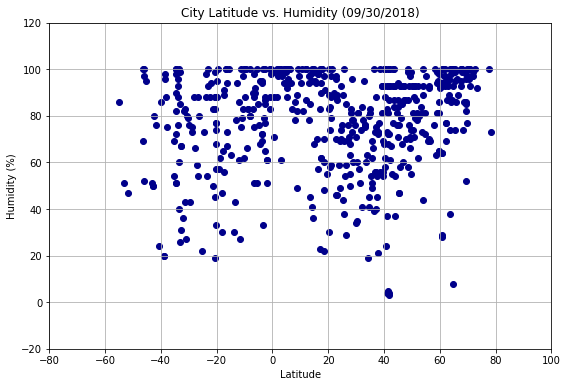

In [7]:
#Scatterplot
plt.figure(figsize=(9,6))
plt.scatter(city_completed_df['Lat'], city_completed_df['Humidity'],marker="o", color = "DarkBlue") 
plt.title(f"City Latitude vs. Humidity ({date_of_analysis})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-20, 120)
plt.xlim(-80, 100)



#Save the figure
plt.savefig("HW6_figure2.png")


# Latitude vs. Cloudiness Plot 

(-80, 100)

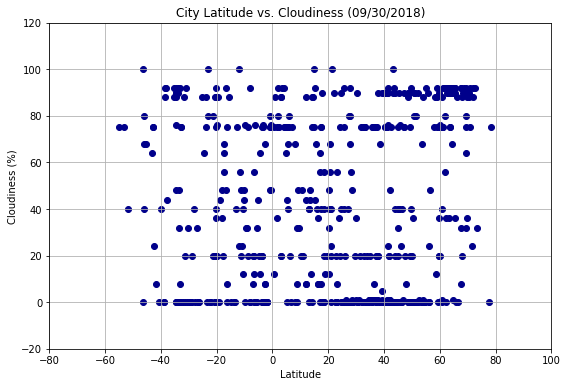

In [10]:
#Scatterplot
plt.figure(figsize=(9,6))
plt.scatter(city_completed_df['Lat'], city_completed_df['Cloudiness'],marker="o", color = "DarkBlue") 
plt.title(f"City Latitude vs. Cloudiness ({date_of_analysis})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-20, 120)
plt.xlim(-80, 100)



#Save the figure
plt.savefig("HW6_figure3.png")


# Latitude vs. Wind Speed Plot

(-80, 100)

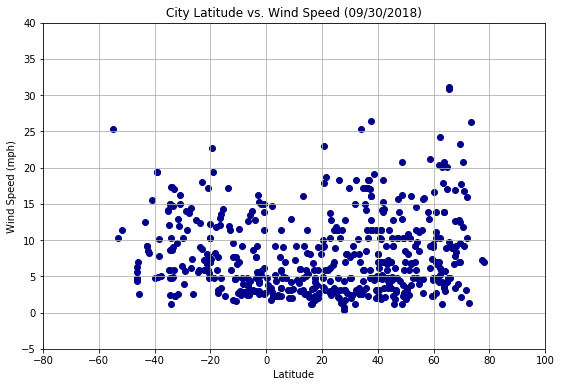

In [11]:
#Scatterplot
plt.figure(figsize=(9,6))
Scatterplot = plt.scatter(city_completed_df['Lat'], city_completed_df['Wind Speed'],marker="o", color = "DarkBlue") 
plt.title(f"City Latitude vs. Wind Speed ({date_of_analysis})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-5, 40)
plt.xlim(-80, 100)




#Save the figure
plt.savefig("HW6_figure4.png")


In [14]:
#export as csv file
city_completed_df.to_csv("City_Weather.csv")